In [1]:
import pandas as pd
import numpy as np
import benchmax.evaluation as ev
import matplotlib.pyplot as plt

## Loading Data

In [4]:
stats = {
    "SATModule_0_clauses"               : "sat_clauses",
    "SATModule_0_variables"             : "sat_vars",
    "fmplex_avg_bound_ratio"            : "avg_bound_ratio",
    "fmplex_avg_branches"               : "avg_branches",
    "fmplex_total_branches"             : "total_branches",
    "fmplex_max_branches"               : "max_branches",
    "fmplex_ignored_branches"           : "ignored_branches",
    "fmplex_bounded_levels"             : "bounded_levels",
    "fmplex_unbounded_levels"           : "unbounded_levels",
    "fmplex_global_conflicts"           : "global_conflicts",
    "fmplex_local_conflicts"            : "local_conflicts",
    "fmplex_local_conflicts_from_prune" : "local_conflicts_from_prune",
    "fmplex_avg_conflict_size"          : "avg_conflict_size",
    "fmplex_avg_bt_distance"            : "avg_bt_distance",
    "fmplex_gauss_conflicts"            : "gauss_conflicts",
    "fmplex_gauss_needed"               : "gauss_needed",
    "fmplex_systems"                    : "systems",
    "fmplex_generated_constraints"      : "generated_constraints",
    "fmplex_neq_splits"                 : "neq_splits",
    "fmplex_timer_count"                : "theory_calls",
    "fmplex_timer_overall_ms"           : "theory_time_ms",
    "fmplex_unsat_calls"                : "unsat_calls",
    "peak_memory_kbytes"                : "mem",
    "simplex_average-check-size"        : "s_avg_check_size",
    "simplex_average-conflict-size"     : "s_avg_conflict_size",
    "simplex_average-num-of_pivots"     : "s_avg_n_pivots",
    "simplex_checks"                    : "s_checks",
    "simplex_checks-with-pivots"        : "s_checks_w_pivots",
    "simplex_conflicts"                 : "s_conflicts",
    "simplex_lemmas"                    : "s_lemmas",
    "simplex_max-pivots"                : "s_max_pivots",
    "simplex_pivots"                    : "s_pivots",
    "simplex_refinements"               : "s_refinements",
    "simplex_tableau-size"              : "s_tableau_size",
    "simplex_theory-propagations"       : "s_theory_prop",
    "simplex_unequal-constraint-splittings" : "s_neq_splits",
    "simplex_non-inc-checks"            : "s_no_inc_checks",
    "simplex_avg-constraints"           : "n_constraints"
}

solver_rename = {
    "FMPlex_BranchLevelPP"          : "FMPlex-MFO",
    "FMPlex_MinColMinRowPP"         : "FMPlex-MCL",
    "FMPlex_PruneBranchLevelPP"     : "FMPlex-UB-MFO",
	"FMPlex_BTPruneBranchLevelPP"   : "FMPlex-BT-MFO",
	"RR1PP"                         : "FMPlex-Rand-1",
    "RR2022PP"                      : "FMPlex-Rand-2",
    "RRpi8PP"                       : "FMPlex-Rand-3",
    "FouMoSolver"                   : "FME",
    "NoIncSimplex"                  : "Simplex"
}

solver_rename_conj = {
    "FMPlex_BranchLevel"        : "FMPlex-MFO",
    "FMPlex_MinColMinRow"       : "FMPlex-MCL",
    "FMPlex_PruneBranchLevel"   : "FMPlex-UB-MFO",
	"FMPlex_BTPruneBranchLevel" : "FMPlex-BT-MFO",
	"RR1"                       : "FMPlex-Rand-1",
    "RR2022"                    : "FMPlex-Rand-2",
    "RRpi8"                     : "FMPlex-Rand-3",
    "FouMoSolverNoPP"           : "FME",
    "NoIncSimplexNoPP"          : "Simplex"
}

files = {
    "smtlib" : ["simplex-fm-smtlib.xml", "fmplex-variants-smtlib.xml", "fmplex-variants-random-smtlib.xml"],
    "conjunctive" : ["simplex-fm-conjunctions.xml", "fmplex-variants-conjunctions.xml", "fmplex-variants-random-conjunctions.xml"]
}

solvers_smtlib = {f : solver_rename for f in files["smtlib"] }
solvers_conj = { f : solver_rename_conj for f in files["conjunctive"] }

df_raw = ev.xmls_to_pandas(solvers_smtlib, stats.keys())
df_raw_conj = ev.xmls_to_pandas(solvers_conj, stats.keys())

solvernames = ['Simplex','FME',"FMPlex-MFO","FMPlex-MCL","FMPlex-Rand-1","FMPlex-Rand-2","FMPlex-Rand-3","FMPlex-UB-MFO","FMPlex-BT-MFO"]

df_solvers_conj = df_raw_conj[solvernames]
df_solvers = df_raw[solvernames]

# make columns numeric
df_numeric_conj = df_solvers_conj.apply(pd.to_numeric, errors='ignore')
df_numeric = df_solvers.apply(pd.to_numeric, errors='ignore')

# rename columns
df_conj = df_numeric_conj.rename(columns=stats)
df = df_numeric.rename(columns=stats)

## Data Inspection

In [5]:
ev.inspect_answer(df).loc[['solved','sat','unsat','timeout','memout']].transpose()

,solved,sat,unsat,timeout,memout
Simplex,958,527,431,714,81
FME,860,461,399,577,316
FMPlex-MFO,814,432,382,840,99
FMPlex-MCL,820,435,385,830,103
FMPlex-Rand-1,742,383,359,906,105
FMPlex-Rand-2,743,383,360,905,105
FMPlex-Rand-3,738,380,358,912,103
FMPlex-UB-MFO,822,434,388,830,101
FMPlex-BT-MFO,920,499,421,733,100


In [6]:
ev.inspect_answer(df_conj).loc[['solved','sat','unsat','timeout','memout']].transpose()

,solved,sat,unsat,timeout,memout
Simplex,3084,777,2307,0,0
FME,2934,747,2187,107,43
FMPlex-MFO,2962,743,2219,122,0
FMPlex-MCL,2965,742,2223,119,0
FMPlex-Rand-1,2806,668,2138,278,0
FMPlex-Rand-2,2823,671,2152,261,0
FMPlex-Rand-3,2820,668,2152,264,0
FMPlex-UB-MFO,2988,744,2244,96,0
FMPlex-BT-MFO,3084,777,2307,0,0


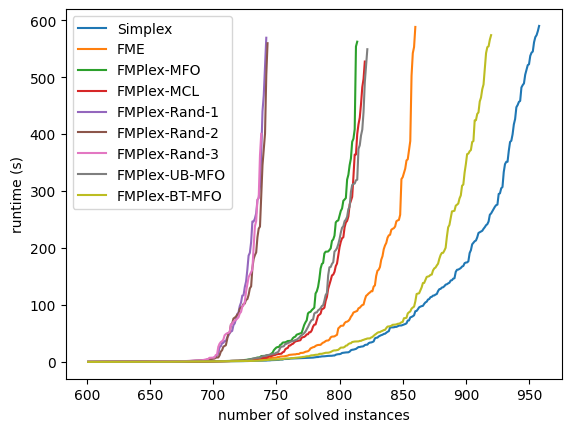

In [7]:
def perf_prof(df, solvers, column = 'runtime'):
    ax = plt.gca()
    for solver in solvers:
        df_cum = ev.cumulate_by_column(ev.filter_solved(df, solver), (solver, column))
        df_cum[df_cum.index > 600].plot(ax=ax, kind='line', label=solver)
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("number of solved instances")
    return ax

ax = perf_prof(df, ev.get_solvers(df))
ax.legend(solvernames)
plt.show()

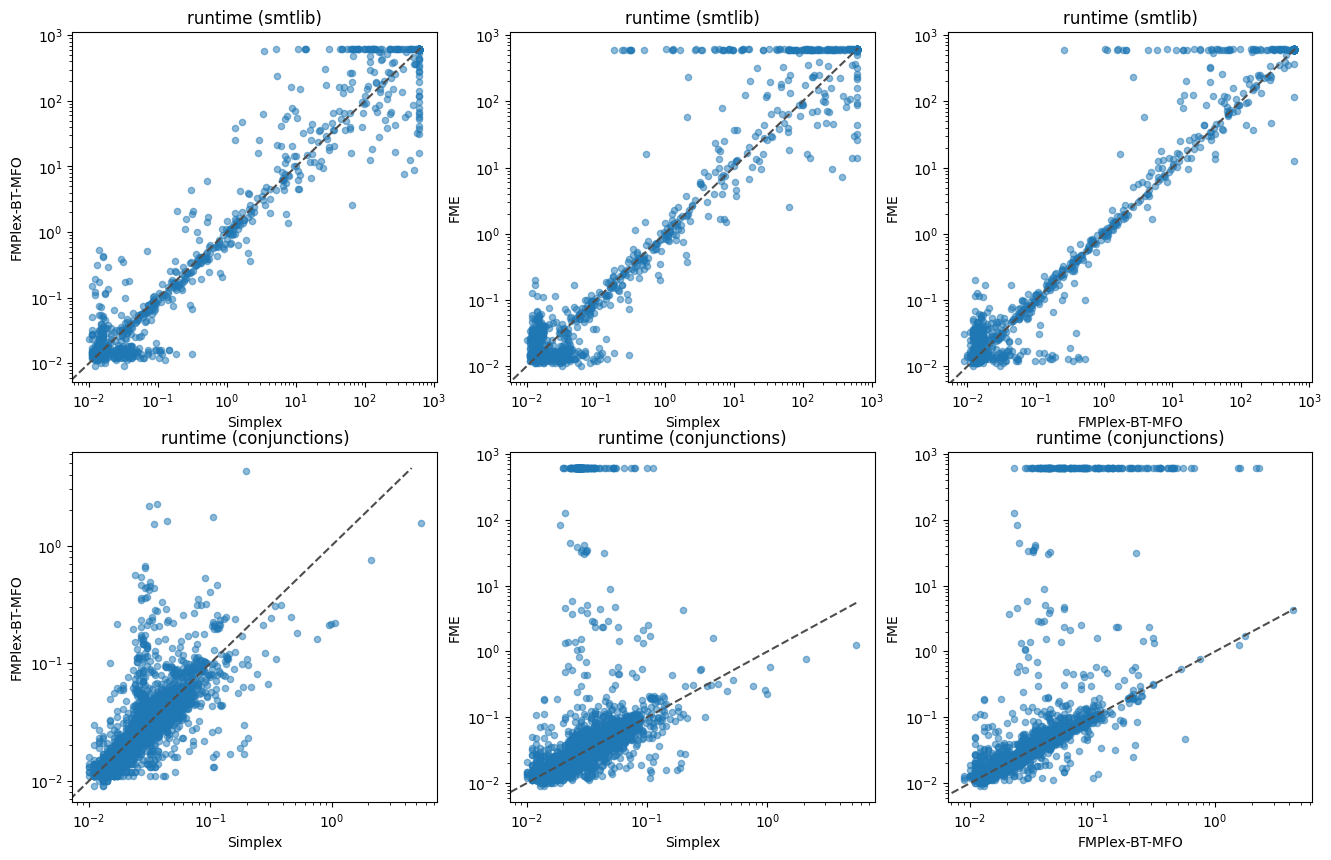

In [17]:
def apply_rows(d,c):
    return d.apply(c,axis=1)

def filter_rows(d,c):
    return d[apply_rows(d,c)]

def solved_by(d, solvers):
    return filter_rows(d,(lambda x : all([x[(s,'answer')] in ['sat','unsat'] for s in solvers])))

def not_none(d, cols):
    return filter_rows(d,(lambda x: all([x[col] != None for col in cols])))

def scatter(d, s1, s2, col, alt_title=None, split_by_sat=True):
    filtered = not_none(d, [(s1,col),(s2,col)])
    c_map = {'sat' : 'turquoise', 'unsat' : 'orange', 'timeout' : 'black', 'memout' : 'purple'}
    if split_by_sat:
        ax = ev.scatter_plot(filtered, s1, s2, col, category=(s1, 'answer'), colormap=c_map)
    else:
        ax = ev.scatter_plot(filtered, s1, s2, col)
    ev.scatter_equal_line(ax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    if alt_title:
        ax.set_title(alt_title)
    else:
        ax.set_title(col)

fig = plt.figure(figsize =(16, 10))
plt.subplot(2,3,1)
scatter(df, 'Simplex', 'FMPlex-BT-MFO', 'runtime', 'runtime (smtlib)', False)
plt.subplot(2,3,2)
scatter(df, 'Simplex', 'FME', 'runtime', 'runtime (smtlib)', False)
plt.subplot(2,3,3)
scatter(df, 'FMPlex-BT-MFO', 'FME', 'runtime', 'runtime (smtlib)', False)
plt.subplot(2,3,4)
scatter(df_conj, 'Simplex', 'FMPlex-BT-MFO', 'runtime', 'runtime (conjunctions)', False)
plt.subplot(2,3,5)
scatter(df_conj, 'Simplex', 'FME', 'runtime', 'runtime (conjunctions)', False)
plt.subplot(2,3,6)
scatter(df_conj, 'FMPlex-BT-MFO', 'FME', 'runtime', 'runtime (conjunctions)', False)
plt.show()

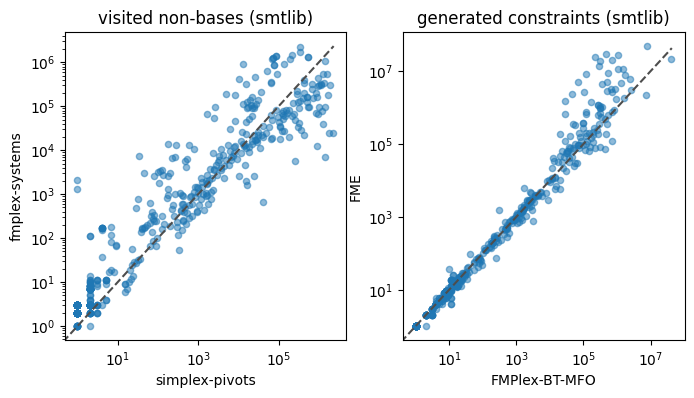

In [11]:
fig = plt.figure(figsize =(8, 4))

plt.subplot(1,2,1)
ax = plt.gca()
df.plot.scatter(ax = ax, x=('Simplex', 's_pivots'), y=('FMPlex-BT-MFO', 'systems'), alpha=0.5)
ax.set_xlabel("simplex-pivots")
ax.set_ylabel("fmplex-systems")
ev.scatter_equal_line(ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('visited non-bases (smtlib)')

plt.subplot(1,2,2)
ax = ev.scatter_plot(df, 'FMPlex-BT-MFO', 'FME', 'generated_constraints')
ev.scatter_equal_line(ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('generated constraints (smtlib)')

plt.show()

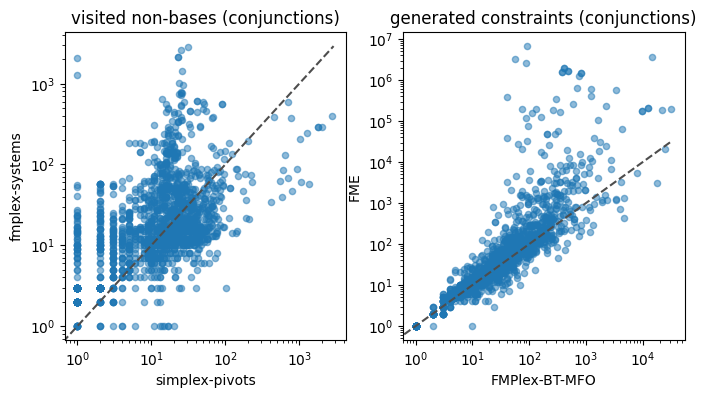

In [12]:
fig = plt.figure(figsize =(8, 4))

plt.subplot(1,2,1)
ax = plt.gca()
df_conj.plot.scatter(ax = ax, x=('Simplex', 's_pivots'), y=('FMPlex-BT-MFO', 'systems'), alpha=0.5)
ax.set_xlabel("simplex-pivots")
ax.set_ylabel("fmplex-systems")
ev.scatter_equal_line(ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('visited non-bases (conjunctions)')

plt.subplot(1,2,2)
ax = ev.scatter_plot(df_conj, 'FMPlex-BT-MFO', 'FME', 'generated_constraints')
ev.scatter_equal_line(ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('generated constraints (conjunctions)')

plt.show()